

<img src="ALMAARC.png" width="250" height="240"  align="right"/> 



<hr style="border:2px solid darkblue"> </hr>

# NB7. Query by sensitivity

<hr style="border:2px solid darkblue"> </hr>


In this notebook we query the observations of higher sensitivity at a given resolution.

The relevant columns in the ALMA Archive datasets are 
* *sensitivity_10kms* 
* *cont_sensitivity_bandwidth*. 


In [2]:
from astropy.table import Table
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pyvo
import matplotlib.pyplot as plt

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")



<hr style="border:2px solid darkblue"> </hr>


## Query spectra by sensitivy 
<hr style="border:2px solid darkblue"> </hr>




In [3]:
def query_sensitiviy_spectral(sci_key, sens_max):

    query = f"  \
            SELECT  * \
            FROM ivoa.obscore  \
            WHERE  \
            science_keyword like '%{sci_key}%'  \
            AND    \
            science_observation = 'T'  \
            AND  \
            sensitivity_10kms < {sens_max}  \
             "

    result = service.search(query)

    return result.to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>


## Query  by continuum sensitivy  bandwidth
<hr style="border:2px solid darkblue"> </hr>





In [6]:
def query_sensitiviy_cont(sci_key, sens_max):

    query = f"  \
            SELECT  *  \
            FROM ivoa.obscore  \
            WHERE  \
            science_keyword like '%{sci_key}%'  \
            AND     \
            science_observation = 'T'   \
            AND     \
            cont_sensitivity_bandwidth < {sens_max}   \
             "

    result = service.search(query)

    return result.to_table().to_pandas()

<hr style="border:2px solid darkblue"> </hr>


## Examples
<hr style="border:2px solid darkblue"> </hr>




## Example 7a.  Where are the most sensitive extragalactic observations?

In [7]:
output = query_sensitiviy_cont('galaxies', 0.1)

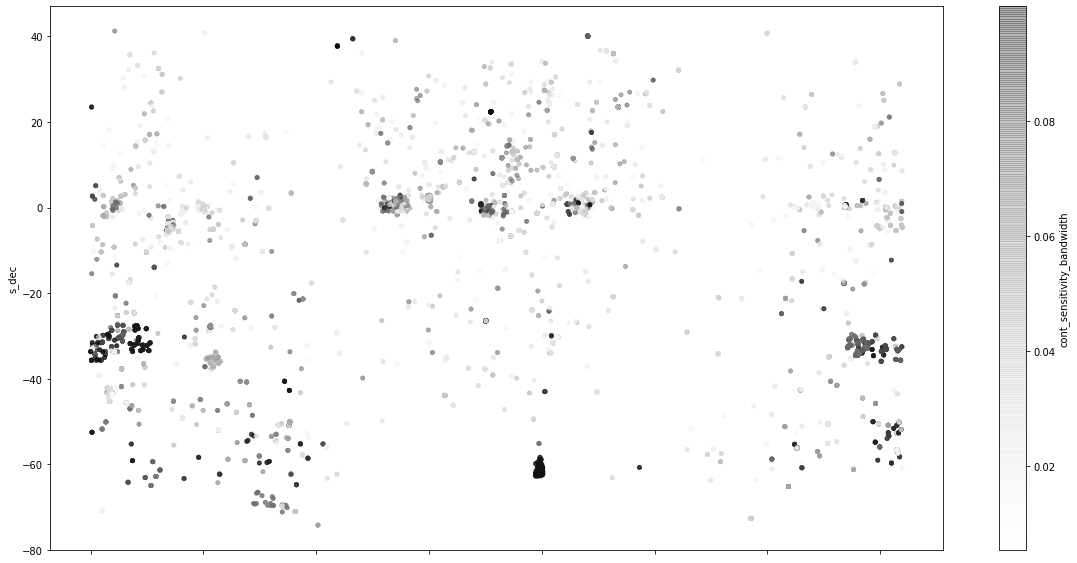

In [8]:
plt.rcParams["figure.figsize"] = (20,10)

output.plot(kind='scatter', x='s_ra', y='s_dec',c='cont_sensitivity_bandwidth',              
              s=15, alpha=0.3)